<a href="https://colab.research.google.com/github/jayachandrareddykamineni/Deep-Learning-For-Google-Stock-Price-Forecasting/blob/master/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive

## Loading Data into Google colab from Drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1dhrosLtDSau1zrmlVmxk84asLmcgDDaJ'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('export.csv') # now you can use export.csv 

In [0]:
data=pd.read_csv("export.csv")

In [5]:
data.head()

,timestamp,open,high,low,close,volume
0,2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215
1,2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
2,2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
3,2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
4,2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452


In [6]:
data.tail()

,timestamp,open,high,low,close,volume
3574,2004-08-25,104.76,108.00,103.88,106.000,9188600
3575,2004-08-24,111.24,111.60,103.57,104.870,15247300
3576,2004-08-23,110.76,113.48,109.05,109.400,18256100
3577,2004-08-20,101.01,109.08,100.50,108.310,22834300
3578,2004-08-19,100.01,104.06,95.96,100.335,44659000


In [0]:
data=data[data.iloc[:,0]>='2013-01-01']

In [8]:
data.tail()

,timestamp,open,high,low,close,volume
1467,2013-01-08,735.54,736.2999,724.4300,733.30,3348800
1468,2013-01-07,735.45,739.3800,730.5800,734.75,3308000
1469,2013-01-04,729.34,741.4700,727.6801,737.97,5521400
1470,2013-01-03,724.93,731.9300,720.7200,723.67,4631700
1471,2013-01-02,719.42,727.0000,716.5500,723.25,5077500


In [9]:
data.head()

,timestamp,open,high,low,close,volume
0,2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215
1,2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
2,2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
3,2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
4,2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452


In [0]:
train_data=data[data.iloc[:,0]<'2018-08-01']
train_data=train_data.iloc[::-1]

In [11]:
train_data.head()

,timestamp,open,high,low,close,volume
1471,2013-01-02,719.42,727.0000,716.5500,723.25,5077500
1470,2013-01-03,724.93,731.9300,720.7200,723.67,4631700
1469,2013-01-04,729.34,741.4700,727.6801,737.97,5521400
1468,2013-01-07,735.45,739.3800,730.5800,734.75,3308000
1467,2013-01-08,735.54,736.2999,724.4300,733.30,3348800


In [12]:
train_data.tail()

,timestamp,open,high,low,close,volume
71,2018-07-25,1252.62,1278.24,1249.05,1275.94,2575437
70,2018-07-26,1267.18,1287.40,1263.00,1285.50,2734302
69,2018-07-27,1289.12,1291.44,1244.49,1252.89,2418090
68,2018-07-30,1245.05,1252.89,1224.17,1230.04,2194837
67,2018-07-31,1231.71,1241.21,1216.19,1227.22,1969111


In [13]:
train_data.shape

(1405, 6)

In [0]:
test_data=data[data.iloc[:,0]>='2018-08-01']

In [15]:
test_data=test_data.iloc[::-1]
test_data.tail()

,timestamp,open,high,low,close,volume
4,2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452
3,2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
2,2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
1,2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
0,2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215


In [0]:
training_set = train_data.iloc[:, 1:2].values
#training_set

In [0]:
import numpy as np
#training_set=np.flipud(training_set) 

In [0]:
real_stock_price = test_data.iloc[:, 1:2].values

In [19]:
real_stock_price
#real_stock_price=np.flipud(real_stock_price)

array([[1239.11],
       [1218.5 ],
       [1245.18],
       [1241.61],
       [1252.01],
       [1256.72],
       [1262.73],
       [1259.18],
       [1251.2 ],
       [1252.5 ],
       [1244.28],
       [1241.99],
       [1222.04],
       [1220.66],
       [1223.02],
       [1214.22],
       [1219.88],
       [1226.  ],
       [1244.14],
       [1255.9 ],
       [1255.  ],
       [1263.4 ],
       [1252.21],
       [1222.52],
       [1209.22],
       [1198.57],
       [1172.  ],
       [1184.2 ],
       [1171.1 ],
       [1182.  ],
       [1179.7 ],
       [1188.  ],
       [1177.77],
       [1162.66],
       [1168.96],
       [1180.67],
       [1194.92],
       [1159.41],
       [1184.25],
       [1193.69],
       [1200.  ],
       [1204.09],
       [1213.  ],
       [1206.67],
       [1212.  ],
       [1205.03],
       [1176.  ],
       [1160.  ],
       [1151.31],
       [1136.4 ],
       [1079.04],
       [1119.64],
       [1118.  ],
       [1113.48],
       [1140.  ],
       [11

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [21]:
training_set_scaled.shape

(1405, 1)

In [0]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1405):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
print(X_train)

[[0.2787512  0.28572695 0.29131007 ... 0.3978579  0.38922368 0.3858181 ]
 [0.28572695 0.29131007 0.29904542 ... 0.38922368 0.3858181  0.37444928]
 [0.29131007 0.29904542 0.29915937 ... 0.3858181  0.37444928 0.38651441]
 ...
 [0.67701423 0.66608852 0.65879627 ... 0.97705981 0.95379045 0.97222363]
 [0.66608852 0.65879627 0.70219527 ... 0.95379045 0.97222363 1.        ]
 [0.65879627 0.70219527 0.71577961 ... 0.97222363 1.         0.94420671]]


In [24]:
print(y_train)

[0.37444928 0.38651441 0.39780726 ... 1.         0.94420671 0.92731807]


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:

X_train.shape

(1345, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D

In [28]:
X_train.shape[1]

60

In [0]:
regressor = Sequential()

In [30]:
regressor.add(Convolution1D(input_shape = (60, 1),
nb_filter=16,
filter_length=60,
border_mode="same"))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.1))

regressor.add(Convolution1D(nb_filter=16,
filter_length=8,
border_mode="same"))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.1))

regressor.add(Convolution1D(nb_filter=8,
filter_length=4,
border_mode="same"))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.1))



regressor.add(MaxPooling1D(pool_size=2))

regressor.add(LSTM(150,return_sequences=True))
regressor.add(Dropout(0.1))


regressor.add(LSTM(150))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.1))



 
regressor.add(Dense(128))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))

regressor.add(Dense(64))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))
 

regressor.add(Dense(64))
#regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))



regressor.add(Dense(1))
regressor.add(Activation('tanh'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(60, 1), filters=16, kernel_size=60, padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=16, kernel_size=8, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=8, kernel_size=4, padding="same")`


In [0]:

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
1345/1345 [==============================] - 7s 5ms/step - loss: 0.0620
Epoch 2/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0164
Epoch 3/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0101
Epoch 4/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0082
Epoch 5/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0064
Epoch 6/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 7/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 8/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 9/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 10/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 11/100
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 12/100
1345/1345 [==============================] - 4s 3ms/step - lo

In [0]:
import pandas as pd
dataset_total = pd.concat((train_data['open'], test_data['open']), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)

In [35]:
inputs

array([[1053.89],
       [1064.62],
       [1064.1 ],
       [1095.  ],
       [1100.41],
       [1105.57],
       [1096.9 ],
       [1085.09],
       [1081.46],
       [1066.  ],
       [1079.  ],
       [1089.8 ],
       [1070.  ],
       [1086.9 ],
       [1086.55],
       [1076.  ],
       [1073.48],
       [1082.  ],
       [1112.87],
       [1138.5 ],
       [1154.66],
       [1152.77],
       [1144.58],
       [1131.21],
       [1132.94],
       [1141.02],
       [1152.28],
       [1152.21],
       [1159.92],
       [1152.69],
       [1170.11],
       [1183.3 ],
       [1185.51],
       [1171.49],
       [1155.  ],
       [1144.14],
       [1136.  ],
       [1112.39],
       [1132.31],
       [1115.35],
       [1149.42],
       [1124.6 ],
       [1141.77],
       [1160.  ],
       [1169.99],
       [1155.62],
       [1174.86],
       [1202.8 ],
       [1203.81],
       [1182.74],
       [1208.53],
       [1206.65],
       [1199.24],
       [1195.66],
       [1271.  ],
       [12

In [36]:
len(inputs)

127

In [0]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 127):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [38]:
XTest=np.reshape(X_test[0],(1,60,1))
X_test.shape

(67, 60, 1)

In [0]:

predicted=[]
for i in range(30):

  p=sc.inverse_transform(regressor.predict(XTest))
  predicted.append(sc.inverse_transform(regressor.predict(XTest)))
  XTest=np.reshape(XTest,(60))
  XTest=np.delete(XTest,0)
  XTest=np.append(XTest,sc.transform(p))
  XTest=np.reshape(XTest,(1,60,1))

In [0]:
predicted_stock_price_30days=np.reshape(predicted,(30,1))

In [41]:
predicted_stock_price

array([[1181.2277],
       [1176.4915],
       [1166.5972],
       [1165.4935],
       [1163.4918],
       [1163.1038],
       [1170.4337],
       [1174.7887],
       [1179.7369],
       [1181.4829],
       [1181.8494],
       [1179.256 ],
       [1176.3574],
       [1168.4636],
       [1160.6   ],
       [1155.006 ],
       [1149.7584],
       [1147.9148],
       [1150.4117],
       [1158.3394],
       [1168.117 ],
       [1172.8835],
       [1178.6178],
       [1180.3083],
       [1171.5396],
       [1161.7208],
       [1150.4423],
       [1132.8406],
       [1120.461 ],
       [1111.3003],
       [1112.2874],
       [1117.5808],
       [1124.4222],
       [1127.3003],
       [1125.4252],
       [1123.2329],
       [1124.1654],
       [1127.61  ],
       [1120.3319],
       [1120.8315],
       [1124.8588],
       [1128.5844],
       [1133.9071],
       [1141.1929],
       [1145.1606],
       [1149.4387],
       [1148.7692],
       [1142.1311],
       [1131.296 ],
       [1118.0238],


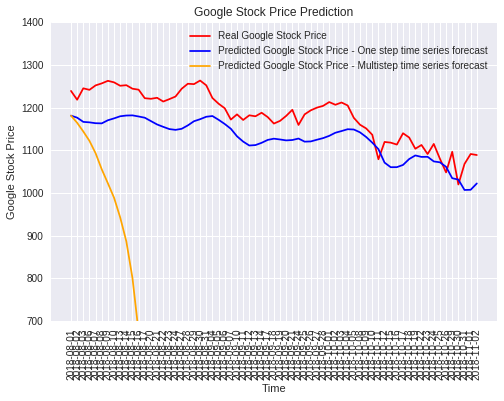

In [42]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price - One step time series forecast')
plt.plot(predicted_stock_price_30days, color = 'orange', label = 'Predicted Google Stock Price - Multistep time series forecast')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.ylim(700,1400)
plt.xticks(np.arange(67),test_data['timestamp'], rotation='vertical')
plt.legend()
plt.show()

In [43]:
real_stock_price.shape

(67, 1)

In [44]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))

61.065720751840466

In [0]:
def cal_target(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [0]:
real_stock_price_trend = cal_target(real_stock_price)
predicted_stock_price_trend =cal_target(predicted_stock_price[0:67])

In [47]:
real_df = pd.DataFrame(real_stock_price_trend)
pred_df = pd.DataFrame(predicted_stock_price_trend)
acc_df = pd.concat((real_df[0],pred_df[0]), axis=1)
acc_df.head(100)

,0,0
0,-1,-1
1,1,-1
2,-1,-1
3,1,-1
4,1,-1
5,1,1
6,-1,1
7,-1,1
8,1,1
9,-1,1


In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(real_stock_price_trend, predicted_stock_price_trend)
print(score)

0.5


In [49]:
from sklearn.metrics import classification_report
print(classification_report(real_stock_price_trend, predicted_stock_price_trend))

              precision    recall  f1-score   support

          -1       0.54      0.53      0.54        36
           1       0.45      0.47      0.46        30

   micro avg       0.50      0.50      0.50        66
   macro avg       0.50      0.50      0.50        66
weighted avg       0.50      0.50      0.50        66



In [50]:
from sklearn.metrics import f1_score
f1_score(real_stock_price_trend, predicted_stock_price_trend)

0.45901639344262296